# Import Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Read the Data**

Read the data using pd.read_csv()

In [2]:
df = pd.read_csv('week3_challenge.csv')
df = df.drop("Unnamed: 0", axis=1)
df.head()

,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,DecisionFlag,...,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id
0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,Declined,...,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,NC_NGA_V2,337.57000,Decline,NaN,a6e99ddb-2c95-4b1e-90cb-d05ffa9d1c9a
1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,Declined,...,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,NaN,NaN,NaN,NaN,NaN
2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,Declined,...,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,NaN,NaN,NaN,NaN,NaN
3,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,Declined,...,46.0,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18,NC_NGA_V2,394.94000,Decline,18a,da360fe9-8e86-4031-afb9-2143a3f734ee
4,201901,Client did not meet approval score.,16JgKGioSsWVaWdY7noC8A_1547701922961,563455515,303057983993,credit,True,2,NG,Declined,...,114.0,549.0,1474.0,31577.275467,7af8400ec773914c8d1fed044aa420b7,RC_NGA_V1L,423.70578,Decline,NaN,NaN


# Drop Columns with more than 30% values missing



In [3]:
df_drop_null = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)
df_drop_null.head()

,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,DecisionFlag,...,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId
0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,Declined,...,0.0,0.0,48872.0,0.985554,0.929771,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360
1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,Declined,...,0.0,0.0,65335.0,0.956868,0.917550,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c
2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,Declined,...,0.0,0.0,98762.0,0.000000,0.000000,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc
3,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,Declined,...,50.0,0.0,1530.0,0.762092,0.777778,46.0,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18
4,201901,Client did not meet approval score.,16JgKGioSsWVaWdY7noC8A_1547701922961,563455515,303057983993,credit,True,2,NG,Declined,...,0.0,0.0,29949.0,0.937828,0.938942,114.0,549.0,1474.0,31577.275467,7af8400ec773914c8d1fed044aa420b7


# Number of Columns Dropped

In [4]:
diff = len(df.columns)- len(df_drop_null.columns)
print('The number of columns dropped is {}'.format(diff))

The number of columns dropped is 18


# Select all Numeric Columns

In [5]:
numeric_df = df_drop_null.select_dtypes(include=['float64', 'int64'])
numeric_df.head()

,createdAt_Month,SystemCustomerID,SystemLoanID,next_loan_number,Income,__v,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,demofeatures_num_children,...,callFeatures_vol_calls_1_mnth_out,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome
0,201812,334043596,302881418623,1,200000.0,0.0,200000.0,1.0,28.0,0.0,...,655.0,0.0,0.0,48872.0,0.985554,0.929771,139.0,287.0,655.0,105872.674499
1,201809,524284563,302328949395,4,80000.0,0.0,100000.0,1.0,33.0,0.0,...,2923.0,0.0,0.0,65335.0,0.956868,0.917550,327.0,1114.0,2923.0,34421.220891
2,201810,481582700,302536536368,2,39500.0,0.0,50000.0,2.0,26.0,0.0,...,1115.0,0.0,0.0,98762.0,0.000000,0.000000,139.0,583.0,1115.0,14447.944277
3,201812,234330495,302887567434,1,50000.0,0.0,50000.0,1.0,36.0,1.0,...,58.0,50.0,0.0,1530.0,0.762092,0.777778,46.0,38.0,108.0,52952.581832
4,201901,563455515,303057983993,2,20000.0,0.0,75000.0,3.0,28.0,3.0,...,1474.0,0.0,0.0,29949.0,0.937828,0.938942,114.0,549.0,1474.0,31577.275467


# Number of Numeric Columns Remaining

In [6]:
numeric_col = len(numeric_df.columns)
print('The number of numeric columns left is {}'.format(numeric_col))

The number of numeric columns left is 248


# Replace Null Values

In [7]:
replace_null = numeric_df.replace(np.nan, 0)
replace_null.isnull().sum()

createdAt_Month                               0
SystemCustomerID                              0
SystemLoanID                                  0
next_loan_number                              0
Income                                        0
__v                                           0
demofeatures_net_income_band                  0
demofeatures_appweek                          0
demofeatures_age_at_application_yrs           0
demofeatures_num_children                     0
smsFeatures_minmaxdebit_tot                   0
smsFeatures_mixmaxcredit_tot                  0
smsFeatures_minbal_tot                        0
smsFeatures_pers_sms_snt_flag                 0
smsFeatures_pers_sms_rec_flag                 0
smsFeatures_arrears_flag                      0
smsFeatures_isp_flag                          0
smsFeatures_sattv_flag                        0
smsFeatures_avg_mly_airtimecredit_val         0
smsFeatures_avg_airtimecredit_tx_val          0
smsFeatures_tot_airtimecredit_vol       

# Scale the Numeric DataFrame





In [8]:
x = replace_null.values
x_scaled = StandardScaler().fit_transform(x)
pd.DataFrame(data= x_scaled, columns=replace_null.columns).head()

,createdAt_Month,SystemCustomerID,SystemLoanID,next_loan_number,Income,__v,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,demofeatures_num_children,...,callFeatures_vol_calls_1_mnth_out,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome
0,-0.552327,-0.542589,0.488975,-0.389585,2.488673,0.0,0.964747,-1.243848,-0.222474,-0.648491,...,0.016726,-0.218086,-0.113863,0.075120,0.792418,0.703710,0.543044,0.004773,-0.006009,2.802797
1,-0.626734,0.114605,-1.045259,2.823083,0.541326,0.0,0.082888,-1.243848,0.443094,-0.648491,...,1.841329,-0.218086,-0.113863,0.127209,0.709694,0.667245,2.471878,1.408808,1.776958,-0.149962
2,-0.601932,-0.032910,-0.468779,0.681305,-0.115904,0.0,-0.358041,-0.386424,-0.488701,-0.648491,...,0.386796,-0.218086,-0.113863,0.232974,-2.049741,-2.070640,0.543044,0.507306,0.355615,-0.975365
3,-0.552327,-0.887051,0.506051,-0.389585,0.054489,0.0,-0.358041,-1.243848,0.842434,0.170522,...,-0.463560,0.348488,-0.113863,-0.074673,0.147992,0.250177,-0.411114,-0.417965,-0.436028,0.615854
4,1.655065,0.249922,0.979306,0.681305,-0.432348,0.0,-0.137577,0.471001,-0.222474,1.808549,...,0.675611,-0.218086,-0.113863,0.015246,0.654783,0.731075,0.286550,0.449582,0.637840,-0.267489


# Perform PCA Redcution 

In [9]:
pca = PCA(n_components=5)
pcas = pca.fit_transform(x_scaled)
pcadf = pd.DataFrame(data=pcas, columns =['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5'])
pcadf.head()

,pca_1,pca_2,pca_3,pca_4,pca_5
0,4.220974,-2.270273,0.757724,-1.598424,4.229971
1,13.464907,-3.685775,-2.142305,-0.889411,-0.219393
2,5.900341,-2.368061,0.093610,0.484609,0.240888
3,-1.884293,1.370643,-0.221699,3.305812,0.306483
4,2.631881,1.782549,0.575716,-2.894523,-0.848423


# Total Explained Variance

In [25]:
pca_exp_var = pca.explained_variance_.sum()
print('The Total explained variance is {}' .format(round(pca_exp_var),2))

The Total explained variance is 134.0


# Perform Kmeans Cluster

In [11]:
model = KMeans(n_clusters=3)
model =model.fit(pcadf)
clusters = model.predict(pcadf)
clusters

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [12]:
pcadf = np.array(pcadf)
type(pcadf)

numpy.ndarray

# Plot Kmeans Cluster 

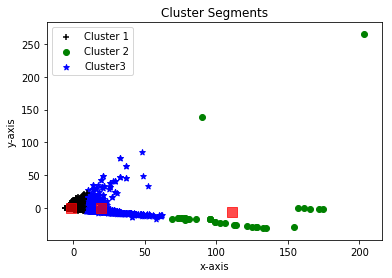

In [13]:
for i in range(len(clusters)):
    if clusters[i] == 0:
        c1 = plt.scatter(pcadf[i, 0], pcadf[i, 1], c='black', marker='+' )
    elif clusters[i] == 1:
        c2 = plt.scatter(pcadf[i, 0], pcadf[i, 1], c='green', marker='o')
    elif clusters[i] == 2:
        c3 = plt.scatter(pcadf[i, 0],  pcadf[i, 1], c='blue', marker='*')
        
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Cluster Segments')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster3'])
plt.show()

# Reconnect Cluster to Original DataFrame

In [14]:
cluster = pd.DataFrame(data =clusters, columns=['clusters'])
connected_df = pd.concat([df, cluster], axis=1)
connected_df.head()

,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,DecisionFlag,...,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id,clusters
0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,Declined,...,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,NC_NGA_V2,337.57000,Decline,NaN,a6e99ddb-2c95-4b1e-90cb-d05ffa9d1c9a,0
1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,Declined,...,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,NaN,NaN,NaN,NaN,NaN,2
2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,Declined,...,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,NaN,NaN,NaN,NaN,NaN,0
3,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,Declined,...,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18,NC_NGA_V2,394.94000,Decline,18a,da360fe9-8e86-4031-afb9-2143a3f734ee,0
4,201901,Client did not meet approval score.,16JgKGioSsWVaWdY7noC8A_1547701922961,563455515,303057983993,credit,True,2,NG,Declined,...,549.0,1474.0,31577.275467,7af8400ec773914c8d1fed044aa420b7,RC_NGA_V1L,423.70578,Decline,NaN,NaN,0


# Exploratory Analysis

Getting the mean of both the predicted and main income

In [15]:
prec_df_gr = connected_df.groupby(['clusters'])[['Income', 'predictedIncome']].mean()
prec_df_gr.head()

,Income,predictedIncome
clusters,,
0,45877.739501,37589.374521
1,84844.563889,57441.201649
2,54835.434510,43223.926722


A bar plot of the predicted Income and the main income

Text(0.5,1,'Income vs Predicted Income')

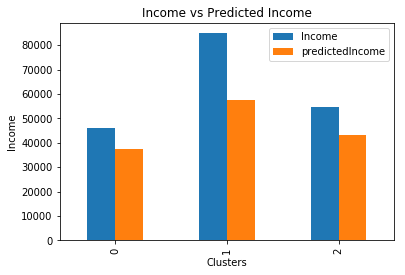

In [16]:
prec_df_gr.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Income')
plt.title('Income vs Predicted Income')

A DataFrame showing the total sum of both the predicted income and main income of each cluster

In [17]:
rec_df_sum = connected_df.groupby(['clusters'])['Income', 'predictedIncome'].sum()
rec_df_sum.head()

,Income,predictedIncome
clusters,,
0,5.087841e+08,4.167910e+08
1,3.054404e+06,2.067883e+06
2,4.754232e+07,3.747514e+07


A bar plot of the sum of the predicted income and main income of each cluster

Text(0.5,1,'Income vs Clusters')

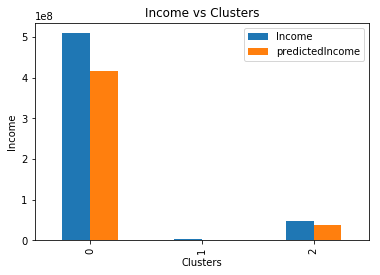

In [18]:
rec_df_sum.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Income')
plt.title('Income vs Clusters')

A seaborn boxplot of the income source and main income grouped by the clusters

Text(0.5,1,'Income vs Income Source')

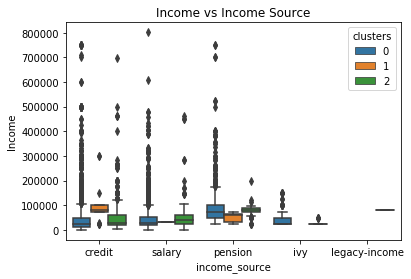

In [19]:
sns.boxplot(data=connected_df[['income_source','Income']], x='income_source', y='Income', hue=connected_df['clusters'])
plt.title('Income vs Income Source')

A seaborn barplot of the income source and main income grouped by the clusters

Text(0.5,1,'Bar Plot of Income vs Income Source')

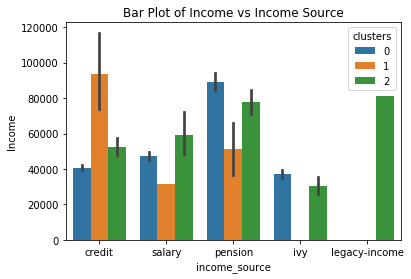

In [20]:
sns.barplot(data=connected_df[['income_source','Income']], x='income_source', y='Income', hue=connected_df['clusters'])
plt.title('Bar Plot of Income vs Income Source')

A seaborn violinplot of the clients gender and main income seperated by the clusters. 

Text(0.5,1,'Violin Plot of Income vs Gender')

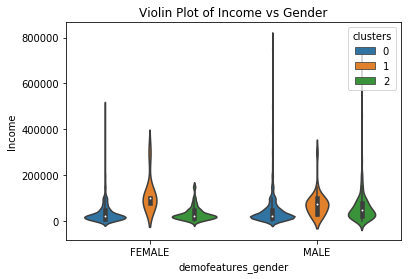

In [21]:
sns.violinplot(data=connected_df[['demofeatures_gender','Income']], x='demofeatures_gender', y='Income', hue=connected_df['clusters'])
plt.title('Violin Plot of Income vs Gender')

A barplot describing the total income of each gender based on the clusters

Text(0.5,1,'Bar Plot of Income vs Gender')

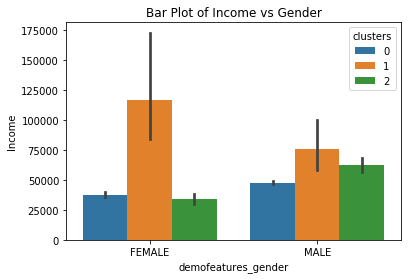

In [22]:
sns.barplot(data=connected_df[['demofeatures_gender','Income']], x='demofeatures_gender', y='Income', hue=connected_df['clusters'])
plt.title('Bar Plot of Income vs Gender')

A bar plot showing the total income based on the clients employment status based on the clusters

Text(0.5,1,'Bar Plot of Income vs Employmnt Status')

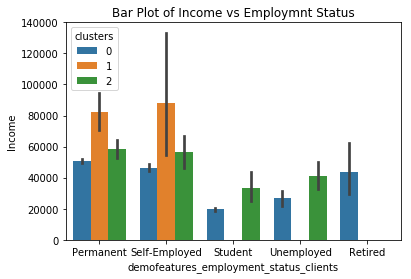

In [23]:
sns.barplot(data=connected_df[['demofeatures_employment_status_clients','Income']], x='demofeatures_employment_status_clients', y='Income', hue=connected_df['clusters'])
plt.title('Bar Plot of Income vs Employmnt Status')

A box plot showing the total income based on the clients employment status based on the clusters

Text(0.5,1,'Box Plot of Income vs Employment Status')

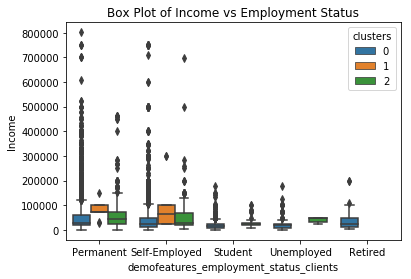

In [24]:
sns.boxplot(data=connected_df[['demofeatures_employment_status_clients','Income']], x='demofeatures_employment_status_clients', y='Income', hue=connected_df['clusters'])
plt.title('Box Plot of Income vs Employment Status')